In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
house_data = pd.read_excel("Clean_Data.xlsx")
house_data

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Humidity (%RH),Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,30.0,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,32.0,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,32.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,33.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,33.0,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,2021-03-23,14:25:00,2021/3/23 14:25:00,heat,heatOff,NaN,Home,21.0,21.0,21.2,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.0,1.0
29672,2021-03-23,14:30:00,2021/3/23 14:30:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.1,0.0
29673,2021-03-23,14:35:00,2021/3/23 14:35:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0
29674,2021-03-23,14:40:00,2021/3/23 14:40:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0


In [254]:
house_data.columns

Index(['Date', 'Time', 'DateTime', 'System Setting', 'System Mode',
       'Calendar Event', 'Program Mode', 'Cool Set Temp (C)',
       'Heat Set Temp (C)', 'Current Temp (C)', 'Current Humidity (%RH)',
       'Outdoor Temp (C)', 'Wind Speed (km/h)', 'Cool Stage 1 (sec)',
       'Heat Stage 1 (sec)', 'Fan (sec)', 'Thermostat Temperature (C)',
       'Thermostat Humidity (%RH)', 'Thermostat Motion', 'Bedroom (C)',
       'Bedroom2', '3rd floor landing (C)', '3rd floor landing2',
       '3rd floor room (C)', '3rd floor room2', 'Basement (C)', 'Basement2'],
      dtype='object')

In [255]:
selected_house_data=house_data[["Heat Set Temp (C)","Current Temp (C)","Outdoor Temp (C)","Current Humidity (%RH)","Heat Stage 1 (sec)"]]
selected_house_data

,Heat Set Temp (C),Current Temp (C),Outdoor Temp (C),Current Humidity (%RH),Heat Stage 1 (sec)
0,21.0,21.3,5.0,30.0,0.0
1,21.0,21.1,5.0,32.0,0.0
2,21.0,20.9,5.2,32.0,0.0
3,21.0,20.7,5.2,33.0,135.0
4,21.0,20.6,5.2,33.0,300.0
...,...,...,...,...,...
29671,21.0,21.2,15.2,21.0,0.0
29672,21.0,21.1,15.7,21.0,0.0
29673,21.0,21.1,15.7,21.0,0.0
29674,21.0,21.1,15.7,21.0,0.0


In [256]:
selected_house_data["Heat Stage 1 (sec)"].value_counts().values

array([15178,  7034,   422,   418,   407,   405,   405,   398,   394,
         392,   389,   389,   388,   387,   385,   379,   375,   374,
         369,   360,   360], dtype=int64)

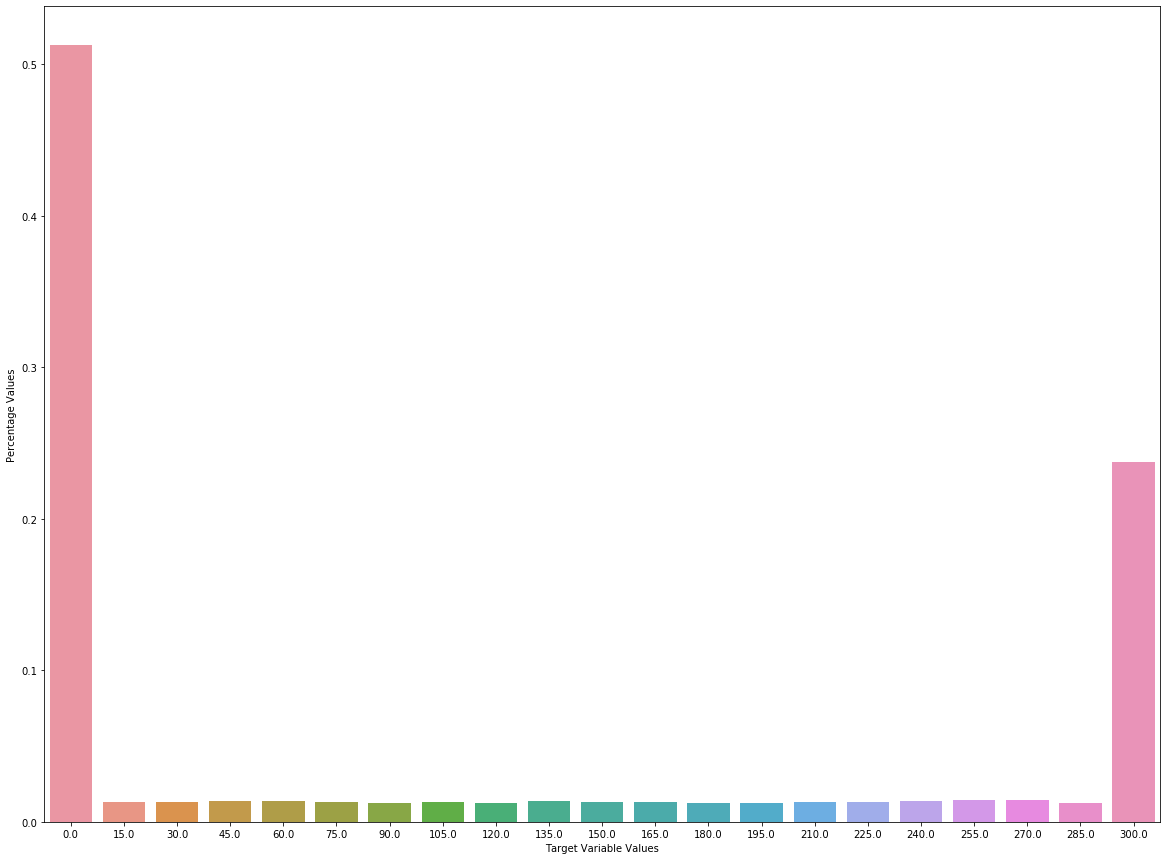

In [257]:
plt.figure(figsize = (20, 15))
ax = sns.barplot(x = selected_house_data["Heat Stage 1 (sec)"].value_counts().index, y = selected_house_data["Heat Stage 1 (sec)"].value_counts(normalize = True).values)
ax.set(xlabel = 'Target Variable Values', ylabel = 'Percentage Values')
plt.savefig("1.png")

[Text(0.5, 0, 'Target Variable Values')]

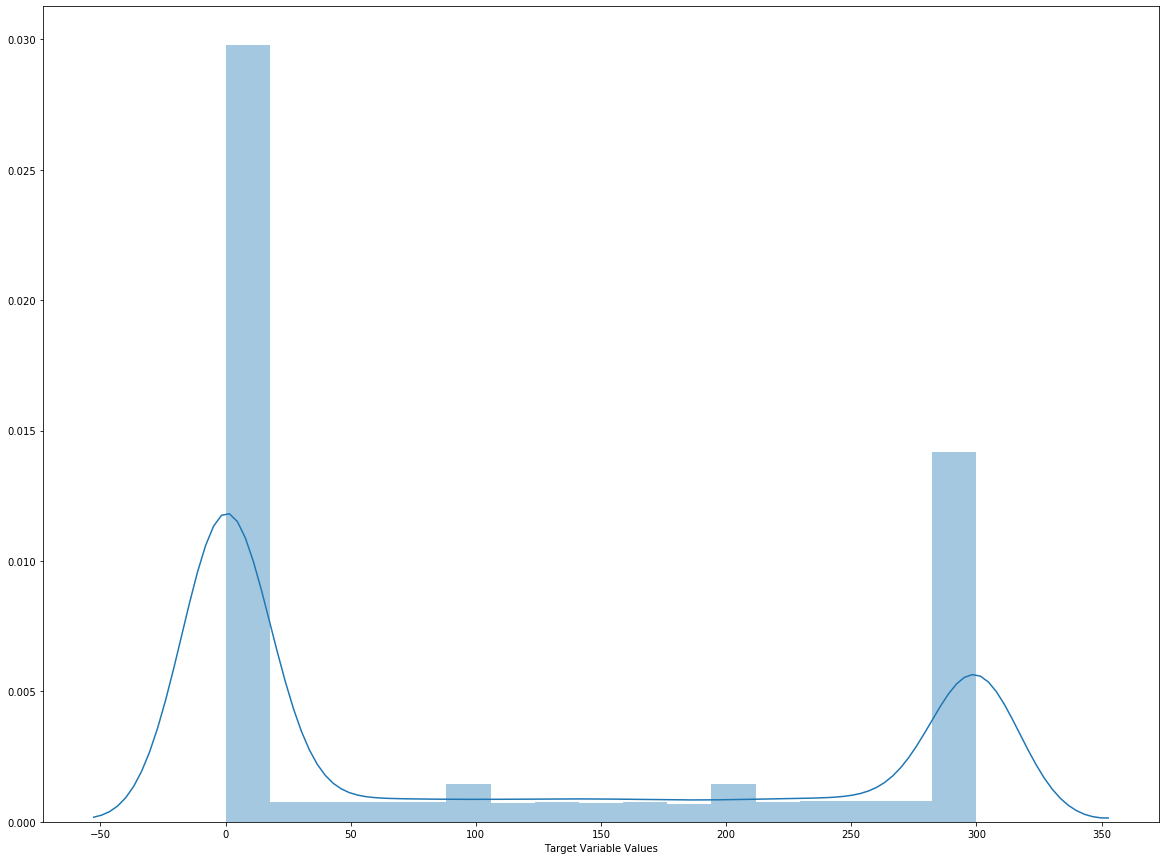

In [258]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(selected_house_data["Heat Stage 1 (sec)"])
ax.set(xlabel = 'Target Variable Values')

In [259]:
start, end = 0, len(house_data)

cur = 0
ls = list()
step = 24
while start <= end - step:
    cur = start + step
    
    ls.append(list(range(start, cur)))
    
    start = cur

In [260]:

df2 = pd.DataFrame({"Heat Set Temp (C)": [], 
                    "Current Temp (C)": [], 
                    "Outdoor Temp (C)" : [], 
                    "Current Humidity (%RH)" : [],
                    "Heat Stage 1 (sec)" : []})
for i in ls:
    dummy, n = pd.DataFrame(selected_house_data.iloc[i].sum()).T, len(i)
    dummy[["Heat Set Temp (C)","Current Temp (C)","Outdoor Temp (C)","Current Humidity (%RH)","Heat Stage 1 (sec)"]] = dummy[["Heat Set Temp (C)","Current Temp (C)","Outdoor Temp (C)","Current Humidity (%RH)","Heat Stage 1 (sec)"]] / n
    df2 = df2.append(dummy, ignore_index = True)

In [261]:
df2.head()

,Heat Set Temp (C),Current Temp (C),Outdoor Temp (C),Current Humidity (%RH),Heat Stage 1 (sec)
0,21.0,20.883333,5.275000,32.791667,102.500
1,21.0,20.887500,4.833333,33.041667,65.625
2,21.0,20.837500,3.600000,33.000000,126.875
3,21.0,20.887500,2.525000,33.000000,98.125
4,21.0,20.858333,2.025000,33.000000,125.000


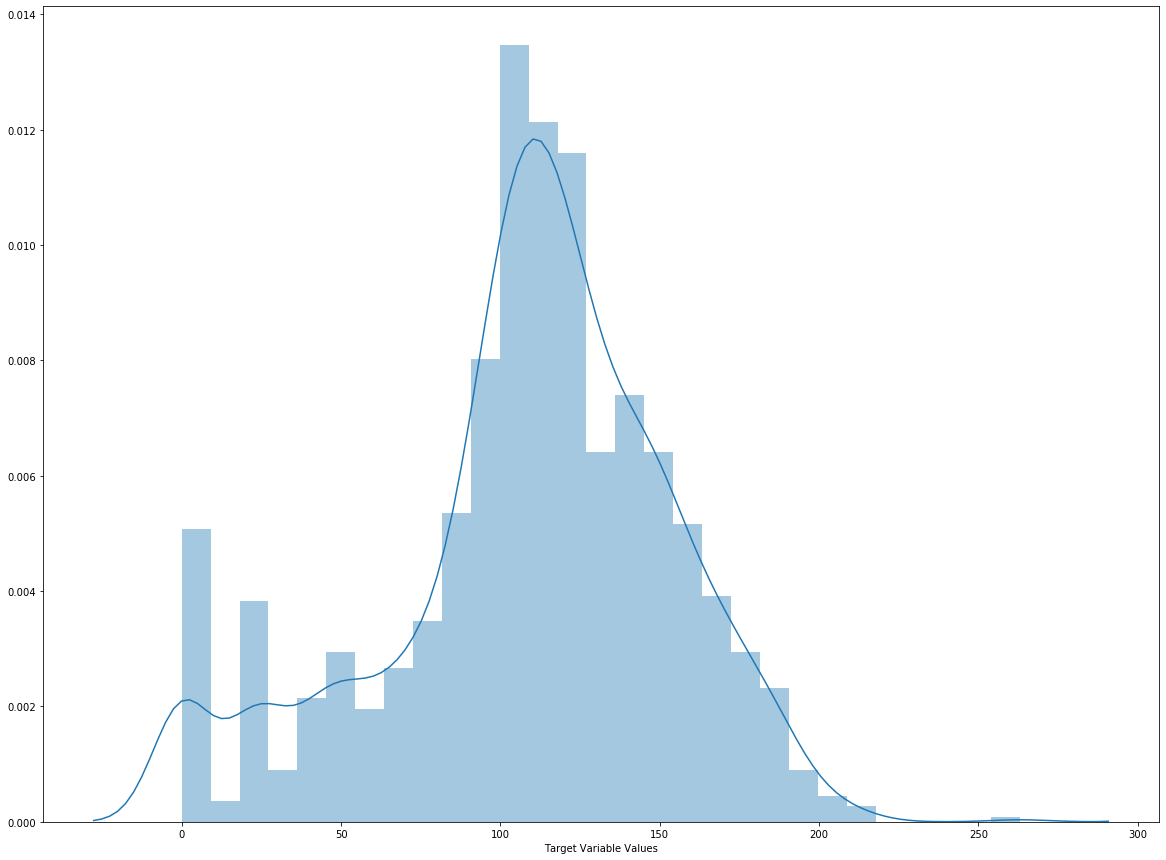

In [262]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(df2["Heat Stage 1 (sec)"])
ax.set(xlabel = 'Target Variable Values')
plt.savefig("2.png")

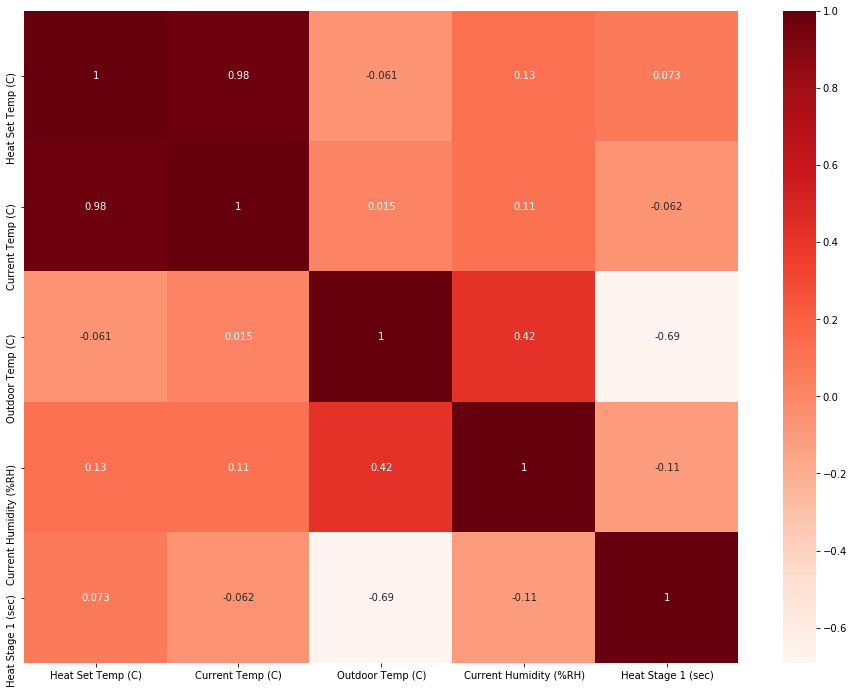

In [263]:
plt.figure(figsize = (16,12))
cor = df2.corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

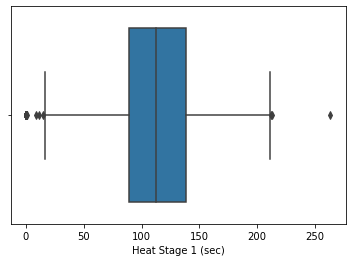

In [264]:
sns.boxplot(df2["Heat Stage 1 (sec)"])

In [265]:
Q1 = df2["Heat Stage 1 (sec)"].quantile(0.25)
Q3 = df2["Heat Stage 1 (sec)"].quantile(0.75)
IQR = Q3 - Q1

In [266]:
((df2["Heat Stage 1 (sec)"] < (Q1 - 1.5 * IQR)) | (df2["Heat Stage 1 (sec)"] > (Q3 + 1.5 * IQR))).sum()

62

In [267]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df2))
print(z)

[[0.09390402 0.1759342  1.44803823 2.14439466 0.13618049]
 [0.09390402 0.1839177  1.36498325 2.20775962 0.94978253]
 [0.09390402 0.08811566 1.13305614 2.19719879 0.40162424]
 ...
 [0.09390402 0.13601668 1.37751985 0.24235217 1.84612375]
 [0.09390402 0.39947229 2.36321008 0.5274945  2.39771835]
 [0.09390402 1.04613608 3.04332066 0.23179135 2.39771835]]


In [268]:
threshold = 3
print(np.where(z > 3))

(array([ 159,  159,  160,  160,  161,  161,  162,  162,  375,  375,  458,
        458,  459,  459,  460,  460,  722,  792,  792,  825,  825, 1081,
       1090, 1091, 1092, 1093, 1094, 1120, 1120, 1120, 1123, 1123, 1124,
       1124, 1125, 1125, 1201, 1213, 1224, 1225, 1226, 1235], dtype=int64), array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 0, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 0, 1, 3, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2],
      dtype=int64))


In [269]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Heat Set Temp (C)          0.000000
Current Temp (C)           0.029167
Outdoor Temp (C)           6.808333
Current Humidity (%RH)     7.000000
Heat Stage 1 (sec)        48.750000
dtype: float64


In [270]:
df2_o = df2[(z < 3).all(axis=1)]

In [271]:
df2_o.shape

(1209, 5)

In [272]:
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis = 1)]
df2_out.shape

(1085, 5)

In [273]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split


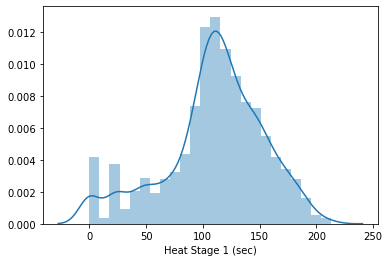

In [274]:
sns.distplot(df2_o["Heat Stage 1 (sec)"])
plt.savefig("3.png")

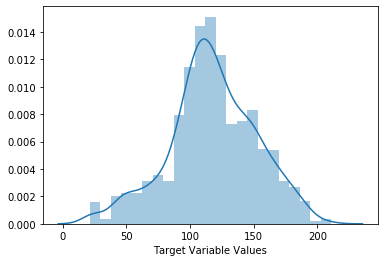

In [275]:
ax = sns.distplot(df2_out["Heat Stage 1 (sec)"])
ax.set(xlabel = 'Target Variable Values')
plt.savefig("4.png")

In [276]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder

In [277]:
df2_out

,Heat Set Temp (C),Current Temp (C),Outdoor Temp (C),Current Humidity (%RH),Heat Stage 1 (sec)
2,21.0,20.837500,3.600000,33.000000,126.875
4,21.0,20.858333,2.025000,33.000000,125.000
5,21.0,20.833333,1.408333,32.541667,114.375
6,21.0,20.862500,0.975000,32.291667,99.375
7,21.0,20.837500,0.600000,32.333333,118.125
...,...,...,...,...,...
1229,21.0,20.854167,6.666667,22.291667,46.250
1230,21.0,20.829167,6.100000,22.916667,73.750
1231,21.0,20.820833,4.816667,23.458333,93.750
1232,21.0,20.850000,3.450000,23.208333,90.625


In [278]:
X = df2_out[["Heat Set Temp (C)","Current Temp (C)","Outdoor Temp (C)","Current Humidity (%RH)"]]
y = df2_out[["Heat Stage 1 (sec)"]]

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [280]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'normal', activation = 'relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 16, epochs = 200, shuffle = True)

Epoch 1/200
55/55 [==============================] - 1s 9ms/step - loss: 116.6908 - mse: 14834.3926 - val_loss: 119.8359 - val_mse: 15401.7158
Epoch 2/200
55/55 [==============================] - 0s 3ms/step - loss: 115.1645 - mse: 14479.3506 - val_loss: 116.5197 - val_mse: 14615.5615
Epoch 3/200
55/55 [==============================] - 0s 3ms/step - loss: 108.7433 - mse: 13041.3721 - val_loss: 105.7545 - val_mse: 12212.2188
Epoch 4/200
55/55 [==============================] - 0s 3ms/step - loss: 92.5686 - mse: 9799.8418 - val_loss: 82.6631 - val_mse: 7814.0317
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 63.3382 - mse: 5093.9424 - val_loss: 46.1726 - val_mse: 2847.6665
Epoch 6/200
55/55 [==============================] - 0s 3ms/step - loss: 31.9310 - mse: 1564.0844 - val_loss: 23.8197 - val_mse: 933.6038
Epoch 7/200
55/55 [==============================] - 0s 3ms/step - loss: 24.7914 - mse: 1009.5430 - val_loss: 22.8730 - val_mse: 859.3856
Epoch 8/200
55/55

55/55 [==============================] - ETA: 0s - loss: 16.5677 - mse: 550.43 - 0s 5ms/step - loss: 16.9404 - mse: 587.2402 - val_loss: 14.5380 - val_mse: 479.8558
Epoch 120/200
55/55 [==============================] - ETA: 0s - loss: 16.9163 - mse: 587.48 - 0s 7ms/step - loss: 16.9163 - mse: 587.4837 - val_loss: 14.5357 - val_mse: 479.2715
Epoch 121/200
55/55 [==============================] - 0s 7ms/step - loss: 16.9632 - mse: 589.3635 - val_loss: 14.5609 - val_mse: 474.2965
Epoch 122/200
55/55 [==============================] - 0s 7ms/step - loss: 16.9521 - mse: 589.4151 - val_loss: 14.6407 - val_mse: 470.3038
Epoch 123/200
55/55 [==============================] - ETA: 0s - loss: 16.6494 - mse: 551.83 - 0s 8ms/step - loss: 16.9356 - mse: 585.9324 - val_loss: 14.5355 - val_mse: 478.4329
Epoch 124/200
55/55 [==============================] - 0s 8ms/step - loss: 16.9357 - mse: 586.4454 - val_loss: 14.5398 - val_mse: 477.0411
Epoch 125/200
55/55 [==============================] - 0s 6m

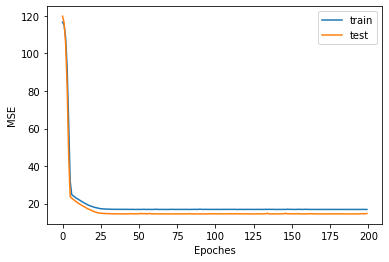

In [281]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

plt.xlabel("Epoches")
plt.ylabel("MSE")
plt.savefig("5.png")
plt.show()

In [282]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 7         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [283]:
y_predicted = classifier.predict(X_test)

In [284]:
from sklearn.metrics import mean_absolute_error,f1_score

In [285]:
mean_absolute_error(y_test, y_predicted)

14.797436287875549

## Approch(2)

In [286]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

In [287]:
house_data = house_data.fillna(method = "bfill")

In [288]:
house_data.isnull().sum()

Date                              0
Time                              0
DateTime                          0
System Setting                    0
System Mode                       0
Calendar Event                29548
Program Mode                      0
Cool Set Temp (C)                 0
Heat Set Temp (C)                 0
Current Temp (C)                  0
Current Humidity (%RH)            0
Outdoor Temp (C)                  0
Wind Speed (km/h)                 0
Cool Stage 1 (sec)                0
Heat Stage 1 (sec)                0
Fan (sec)                         0
Thermostat Temperature (C)        0
Thermostat Humidity (%RH)         0
Thermostat Motion                 0
Bedroom (C)                       0
Bedroom2                          0
3rd floor landing (C)             0
3rd floor landing2                0
3rd floor room (C)                0
3rd floor room2                   0
Basement (C)                      0
Basement2                         0
dtype: int64

In [289]:
numerical_vars = ['Heat Set Temp (C)', 'Current Temp (C)', 'Current Humidity (%RH)', 'Outdoor Temp (C)','Thermostat Temperature (C)', 'Thermostat Humidity (%RH)']
sc = StandardScaler()
sc.fit(house_data[numerical_vars])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [290]:
scaler_house_data = house_data[numerical_vars].copy()
scaler_house_data[numerical_vars] = sc.transform(house_data[numerical_vars])
scaler_house_data

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH)
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776
...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425


In [291]:
y_auxHeat = house_data['Heat Stage 1 (sec)'].to_numpy()
y_fan = house_data['Fan (sec)'].to_numpy()

In [292]:
oe = OrdinalEncoder()
y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))
y_fan = oe.fit_transform(y_fan.reshape(-1, 1))

In [293]:
y_auxHeat = y_auxHeat.reshape(y_auxHeat.shape[0], )
y_fan = y_fan.reshape(y_fan.shape[0], )
y_auxHeat = y_auxHeat.astype(int)
y_auxHeat = y_auxHeat.astype(str)

y_fan = y_fan.astype(int)
y_fan = y_fan.astype(str)

In [294]:
scaler_house_data['Heat Stage 1'] = y_auxHeat
scaler_house_data['fan'] = y_fan

In [295]:
scaler_house_data

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH),Heat Stage 1,fan
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,9,9
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,20,20
...,...,...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0,0
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0


In [296]:
from tensorflow.keras.utils import to_categorical
working_df = scaler_house_data.drop(labels = ["fan"], axis = 1)
X = working_df[numerical_vars]
y = to_categorical(working_df[["Heat Stage 1"]])

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
X_train = X_train.values
X_test = X_test.values
y_train.shape

(23740, 21)

In [298]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 20, shuffle = True)

Epoch 1/20
2374/2374 [==============================] - 6s 2ms/step - loss: 1.4767 - accuracy: 0.6696 - val_loss: 1.4090 - val_accuracy: 0.6919
Epoch 2/20
2374/2374 [==============================] - 4s 2ms/step - loss: 1.3551 - accuracy: 0.7058 - val_loss: 1.4087 - val_accuracy: 0.6926
Epoch 3/20
2374/2374 [==============================] - 4s 2ms/step - loss: 1.3539 - accuracy: 0.7068 - val_loss: 1.4131 - val_accuracy: 0.6905
Epoch 4/20
2374/2374 [==============================] - 5s 2ms/step - loss: 1.3536 - accuracy: 0.7056 - val_loss: 1.4051 - val_accuracy: 0.6914
Epoch 5/20
2374/2374 [==============================] - 4s 2ms/step - loss: 1.3534 - accuracy: 0.7067 - val_loss: 1.4060 - val_accuracy: 0.6902
Epoch 6/20
2374/2374 [==============================] - 3s 1ms/step - loss: 1.3523 - accuracy: 0.7061 - val_loss: 1.4035 - val_accuracy: 0.6909
Epoch 7/20
2374/2374 [==============================] - 4s 1ms/step - loss: 1.3522 - accuracy: 0.7077 - val_loss: 1.4075 - val_accuracy:

In [299]:
classifier.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_34 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_35 (Dense)             (None, 21)                525       
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


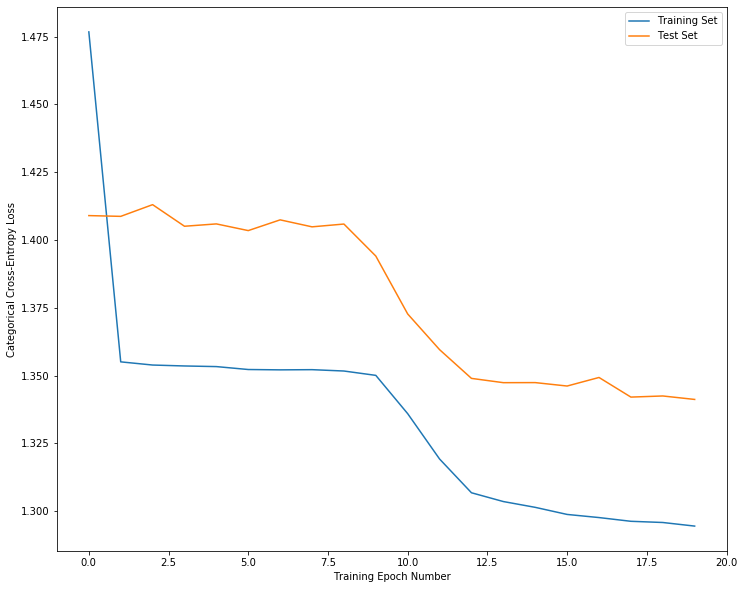

In [300]:
plt.figure(figsize = (12, 10))
plt.plot(history.history['loss'], label = 'Training Set')
plt.plot(history.history['val_loss'], label = 'Test Set')
plt.legend()
plt.xlabel("Training Epoch Number")
plt.ylabel("Categorical Cross-Entropy Loss")
plt.xlim((-1, 20))
plt.savefig("6.png")
plt.show()

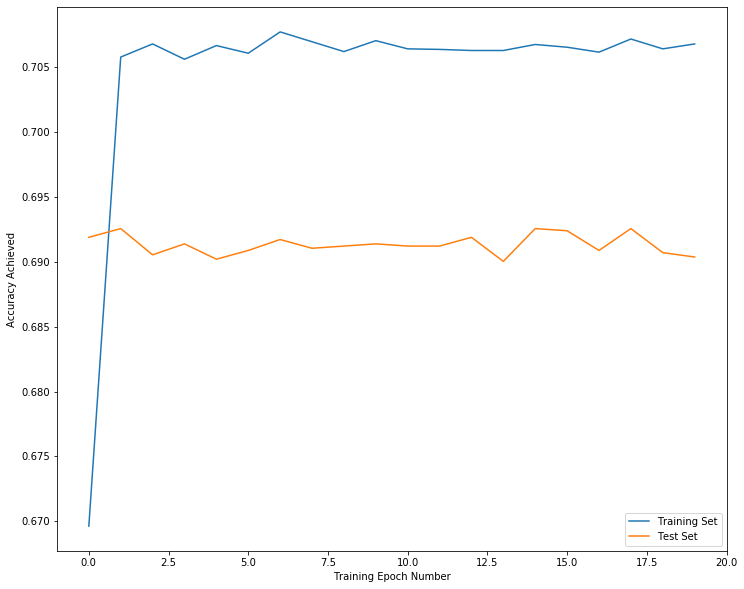

In [301]:
plt.figure(figsize = (12, 10))
plt.plot(history.history['accuracy'], label = 'Training Set')
plt.plot(history.history['val_accuracy'], label = 'Test Set')
plt.legend()
plt.xlabel("Training Epoch Number")
plt.ylabel("Accuracy Achieved")
plt.xlim((-1, 20))
plt.savefig("7.png")
plt.show()

In [302]:
y_predicted = classifier.predict(X_test)
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

array([ 0,  0, 20, ...,  0,  0, 20], dtype=int64)

In [303]:
y_test = np.argmax(y_test, axis = 1)


In [304]:
y_test

array([19,  0, 20, ...,  0,  0, 20], dtype=int64)

In [305]:
import plotly.figure_factory as ff
import plotly.io as pio

In [306]:
cm = confusion_matrix(y_test, y_predicted)
cfm_n = np.flipud(cm)
cfm_n = cfm_n.astype('float') / cfm_n.sum(axis=1)[:, np.newaxis]

z = np.round(cfm_n, 2)
#x = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
y = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
#y = ['20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']
x = ['20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']
#x = ['1', '0']
#y = ['0', '1']


In [307]:
fig = ff.create_annotated_heatmap(z, x = x, y = y, annotation_text = z, colorscale = 'deep')
fig.update_layout(width = 1600, height = 1600, xaxis_showgrid = False, yaxis_showgrid = False, template = 'none')
fig.update_layout(title = {'text': "",
                           'y':0.95,
                           'x':0.47,
                           'xanchor': 'center',
                           'yanchor': 'top'}, 
                  xaxis_title = 'Predicted Labels',
                  yaxis_title = 'True Labels')
fig['layout']['xaxis']['side'] = 'bottom'

fig.show()

In [308]:
test_sum = 0
for i in range(len(y_test)):
    test_sum += (y_test[i] * 15)

In [309]:
test_sum

663540

In [310]:
predicted_sum = 0
for i in range(len(y_predicted)):
    predicted_sum += (y_predicted[i] * 15)

In [311]:
predicted_sum

558300

In [312]:
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

Error Percentage in predicted values is : 15.860385206619043 %


In [313]:
f1_score(y_test, y_predicted, average = 'weighted')

0.587515038163736

In [314]:
mean_absolute_error(y_test, y_predicted)

3.269878706199461

In [315]:
accuracy_score(y_test, y_predicted)

0.6903638814016172

In [320]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train = np.argmax(y_train, axis = 1)
y_train_predicted

array([ 0,  0,  0, ..., 20,  0,  0], dtype=int64)

In [321]:
f1_score(y_train, y_train_predicted, average = 'weighted')

0.6067706788544966

In [322]:
accuracy_score(y_train, y_train_predicted)

0.7070345408593092

In [323]:
mean_absolute_error(y_train, y_train_predicted)

3.0149536647009265